### H2 PDFT Inversion - Orbital Invert

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CADMium import Pssolver, Psgrid, Partition, Inverter
import CADMium

Perform PDFT Calculation. 

But original code may have used "WuYang". 
Code should run as it is but for idential calculations increase to grid size to: [7,12,12]

In [7]:
a = 1.466/2
#Nuclear charge for fragments A and B
Za, Zb = 1,1
#Set polarization 1-Unpolarized, 2-Polarized|
pol = 2
#Fragment a electrons [alpha, beta]
Nmo_a = [[1,0]] #Number of molecular orbitals to calculate
N_a   = [[1,0]]
#Ensemble mix
nu_a = 1
#Fragment b electrons
Nmo_b = [[1,0]]
N_b   = [[1,0]]
#Ensemble mix
nu_b = 1

#Molecular elctron configuration
Nmo_m = [[1,1]]
N_m   = [[1,1]]

#Set up grid
NP = 7
NM = [4,4]
L = np.arccosh(12/a)
loc = np.array(range(-4,5)) #Stencil outline

grid = Psgrid(NP, NM, a, L, loc)
grid.initialize()

part = Partition(grid, Za, Zb, pol, Nmo_a, N_a, nu_a, Nmo_b, N_b, nu_b, {  "AB_SYM"       : True,
                                                                           "ENS_SPIN_SYM" : True,  
                                                                           "kinetic_part_type" : "inversion",
                                                                           "k_family" : "gga",
                                                                           "ke_func_id" : 500,
                                                                            })

#Setup inverter object
mol_solver = Pssolver(grid, Nmo_m, N_m)
part.inverter = Inverter(grid, mol_solver, {  "AB_SYM"         : True,
                                              "ENS_SPIN_SYM"   : True,  
                                              "use_iterative"  : False,
                                              "invert_type"    : "orbitalinvert",
                                              "DISP"           : False,  
                                            })

# part.optPartition.isolated = True
# part.scf({"disp"  : True,
#           "alpha" : [0.6],
#           "e_tol" : 1e-12})

# D0_frag_a = part.KSa.n.copy()
# D0_frag_b = part.KSa.n.copy()


part.optPartition.isolated   = False

part.scf({"disp"       : False,
          "alpha"      : [0.6],
          "max_iter"   : 200,
          "e_tol"      : 1e-9,
          "iterative"  : False,
          "continuing" : False})

#Store full densities under the presence of vp.
Dvp_frag_a = part.KSa.n.copy()
Dvp_frag_b = part.KSb.n.copy()

---
Generate Figure 9. Parititon Potential. 

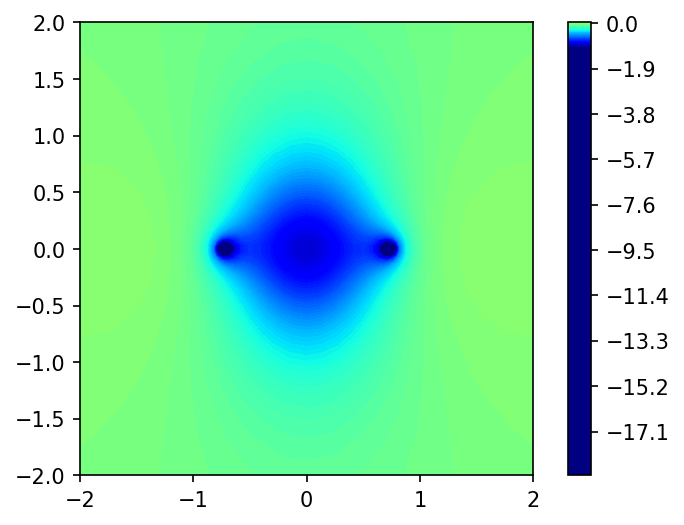

In [8]:
full, x,y = grid.plotter(part.V.vp[:,0])
fig, ax = plt.subplots(dpi=150)

plot = ax.contourf(x,y,full, levels=1000, cmap="jet", vmin=-1, vmax=1)

ax.set_aspect('equal')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

fig.colorbar(plot) 

---
Generate Figure 9. Difference between Fragment Density and Isolated Atomic Density. 

In [9]:
D_grid, x, y = grid.plotter(D0_frag_a[:,0])
D_vp_grid, _, _ = grid.plotter(Dvp_frag_a[:,0])

fig, ax = plt.subplots(dpi=150)

plot = ax.contourf(x,y, D_vp_grid - D_grid, levels=100, cmap="jet", vmin=-0.15, vmax=0.15)

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

fig.colorbar(plot)
# plt.show()

NameError: name 'D0_frag_a' is not defined

---
Generate Figure 11. Components of the Partition Potential

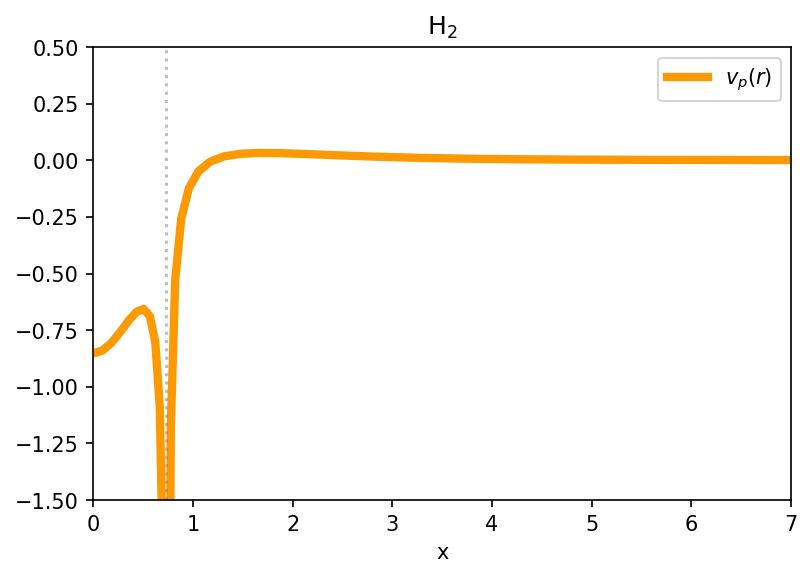

In [23]:
x_axis, vp      = grid.axis_plot(part.V.vp[:,0])
x_axis, vp_kin  = grid.axis_plot(part.V.vp_kin[:,0])
x_axis, vp_xc   = grid.axis_plot(part.V.vp_x[:,0] + part.V.vp_c[:,0] )
x_axis, vp_hext = grid.axis_plot( part.V.vp_h[:,0] + part.V.vp_pot[:,0])

fig, ax = plt.subplots(dpi=150)



ax.plot(x_axis, vp, label='$v_p(r)$', lw=4, color="#FD9903")
# ax.plot(x_axis, vp_kin, label='Kinetic')
# ax.plot(x_axis, vp_xc, label='XC')
# ax.plot(x_axis, vp_hext, label="H + Vext")

ax.set_title("H$_2$")
ax.axvline(x=a, color="gray", ls=':', alpha=0.5)
ax.set_xlim(0,7)
ax.set_ylim(-1.5, 0.5)

ax.set_xlabel('x')
ax.legend()

In [ ]:
values = {}
for i in part.E.__dict__:
    if i.startswith("__") is False:
        values.update({i : getattr(part.E, i)})
values